In [47]:
%matplotlib notebook
from __future__ import print_function
from IPython.display import display

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
sns.set(style='whitegrid')

from sklearn.svm import SVC
import time

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# import pandas as pd


<IPython.core.display.Javascript object>


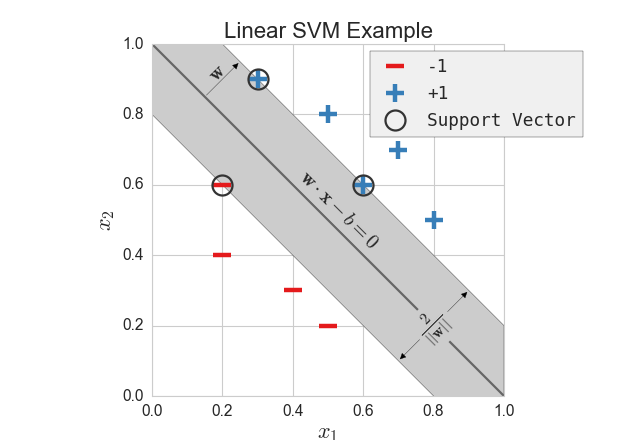

In [188]:
# np.random.seed(6)
# X = np.random.rand(15,2)
X = np.array([[0.2,0.4],
              [0.8,0.5],
              [0.4,0.3],
              [0.5,0.2],
              [0.2,0.6],
              [0.7,0.7],
              [0.3,0.9],
              [0.6,0.6],
              [0.5,0.8]])
Y = np.atleast_2d([1 if np.sum(xi) > 1 else -1 for xi in X]).T

fig,ax = plt.subplots(1)

x = np.linspace(0,1,2)
ax.fill_between(x,1-x-0.2,1-x+0.2, facecolor='#CCCCCC')
ax.plot(x, 1-x, c='#666666', lw=2)
# ax.plot(x, 1-x+0.2, c='#666666', ls='dashed', lw=1)
# ax.plot(x, 1-x-0.2, c='#666666', ls='dashed', lw=1)


posIdxs = np.where(Y > 0)[0]
negIdxs = np.where(Y < 0)[0]
ax.plot(X[negIdxs,0],X[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax.plot(X[posIdxs,0],X[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')

ax.set_xlim(0,1)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylim(0,1)
ax.set_ylabel('$x_2$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Linear SVM Example',fontsize=20)
ax.plot([0.2,0.3,0.6],[0.6,0.9,0.6],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

legend = plt.legend(bbox_to_anchor=(0.62, 0.98), loc=2, borderaxespad=0., frameon=True, numpoints=1, fontsize=16)
plt.setp(legend.texts, family='monospace')
legend.get_frame().set_edgecolor('#000000')
legend.get_frame().set_facecolor('#F0F0F0')

ax.annotate('', xy=(0.7, 0.1), xytext=(0.9,0.3),
            arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))
bbox_props = dict(boxstyle="square,pad=0.2", fc="#CCCCCC", lw=0)
ax.text(0.8,0.2,r'$\frac{2}{||\mathbf{w}||}$', ha='center', va='center', fontsize=20, rotation=45, bbox=bbox_props)
ax.text(0.53,0.53,r'$\mathbf{w} \cdot \mathbf{x} - b = 0$', ha='center', va='center', fontsize=18, rotation=-45, bbox=bbox_props)

ax.annotate('', xy=(0.15, 0.85), xytext=(0.25,0.95),arrowprops=dict(facecolor='black', arrowstyle='<|-'))
ax.text(0.15,0.91,r'$\mathbf{w}$', rotation=45, fontsize=18)

ax.set_aspect('equal')

[ 4.99999794  5.00000373]


<IPython.core.display.Javascript object>


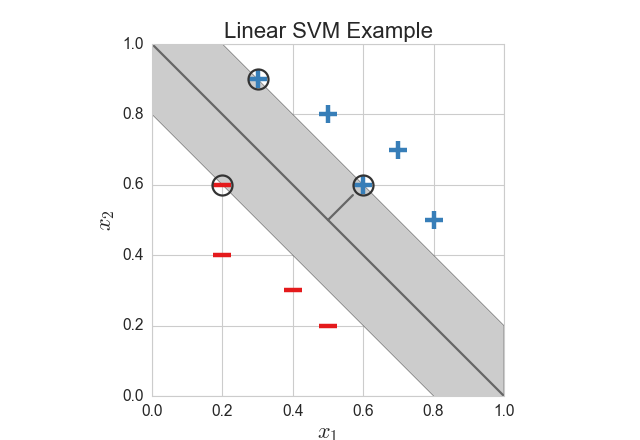

[[-0.70710637  0.29289246]
 [ 0.29289363 -0.70710638]]


In [206]:
from sklearn.svm import SVC

svc = SVC(C=1000, kernel='linear', gamma='auto', shrinking=True, probability=False, tol=1e-12, cache_size=8000, max_iter=-1, decision_function_shape=None, random_state=None)
_ = svc.fit(X,Y.reshape(len(Y),))
w = svc.coef_.flatten()
b = svc.intercept_
sv = svc.support_vectors_
wnorm = np.linalg.norm(w)
print(w)

fig,ax = plt.subplots(1)

x1 = np.linspace(0,1,2)
x2 = (-b - w[0]*x1)/w[1]
x2m = (-1-b - w[0]*x1)/w[1]
x2p = (1-b - w[0]*x1)/w[1]

x1mid = np.average(x1)
x2mid = np.average(x2m)


ax.fill_between(x1,x2m,x2p, facecolor='#CCCCCC')
ax.plot(xm[:,0], xm[:,1], c='#666666', ls='dashed', lw=1)
ax.plot(xp[:,0], xp[:,1], c='#666666', ls='dashed', lw=1)
ax.plot(x1, x2, c='#666666', lw=2)
ax.plot([x1mid,x1mid+(x/wnorm)*2./wnorm], c='#666666', lw=2)

posIdxs = np.where(Y > 0)[0]
negIdxs = np.where(Y < 0)[0]
ax.plot(X[negIdxs,0],X[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax.plot(X[posIdxs,0],X[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')
x = np.linspace(0,1,2)

ax.set_xlim(0,1)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylim(0,1)
ax.set_ylabel('$x_2$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Linear SVM Example',fontsize=20)
ax.plot(sv[:,0],sv[:,1],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

# legend = plt.legend(bbox_to_anchor=(0.62, 0.98), loc=2, borderaxespad=0., frameon=True, numpoints=1, fontsize=16)
# plt.setp(legend.texts, family='monospace')
# legend.get_frame().set_edgecolor('#000000')
# legend.get_frame().set_facecolor('#F0F0F0')

# ax.annotate('', xy=(0.7, 0.1), xytext=(0.9,0.3),
#             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))
# bbox_props = dict(boxstyle="square,pad=0.2", fc="#CCCCCC", lw=0)
# ax.text(0.8,0.2,r'$\frac{2}{||\mathbf{w}||}$', ha='center', va='center', fontsize=20, rotation=45, bbox=bbox_props)
# ax.text(0.53,0.53,r'$\mathbf{w} \cdot \mathbf{x} - b = 0$', ha='center', va='center', fontsize=18, rotation=-45, bbox=bbox_props)

# ax.annotate('', xy=(0.15, 0.85), xytext=(0.25,0.95),arrowprops=dict(facecolor='black', arrowstyle='<|-'))
# ax.text(0.15,0.91,r'$\mathbf{w}$', rotation=45, fontsize=18)

ax.set_aspect('equal')